In [1]:
%matplotlib inline

# Decision Tree Classifier
TODO: Give an introduction to what a decision tree classifier is.

## Import Dependencies
We start by importing the dependencies.

In [2]:
from time import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import ndimage
import matplotlib.pyplot as plt

## Load the Data
Here we load the data from *images.npy* and *labels.npy* and print the shape of each.

In [3]:
# Load the image and label data
X_raw = np.load('./data/images.npy')
y_raw = np.load('./data/labels.npy')

# Print the shape of each
print("X_train original shape:", X_raw.shape)
print("y_train original shape:", y_raw.shape)

X_train original shape: (6500, 28, 28)
y_train original shape: (6500,)


## Print Out Example Data
Using Matplotlib we display 6 examples of the raw images given to us and the classes they are associated with.

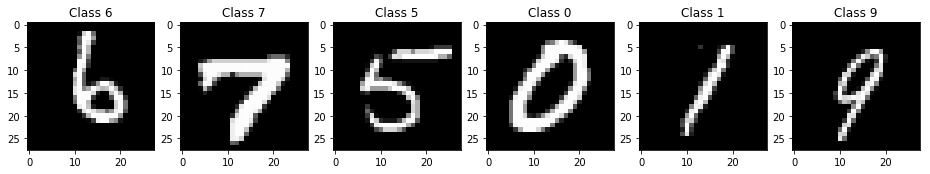

In [4]:
# Plot the first 6 images given
num_figures = 6
plt.figure(figsize=(16,8))
for i in range(num_figures):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_raw[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_raw[i]))

## Reshape The Data
We begin by reshaping the raw data given to us in a *6500x28x28* array into three classes:
* **X_train** - The training set which is composed of 60%, or 3900 images, of the raw image data.
* **X_valid** - The validation set which is composed of 15%, or 975 images, of the raw image data.
* **X_test** - The test set which is composed of 25%, or 1625 images, of the raw image data.

For each of these sets, we reshape the *28x28* images into a *1x784* array.

In [5]:
# Split and reshape the images into test, validation, and test sets
X_train = X_raw[0:3900].reshape(3900, 784)
X_valid = X_raw[3900:4875].reshape(975, 784)
X_test = X_raw[4875:6500].reshape(1625, 784)

# Split the labels into test, validation, and test sets
y_train = y_raw[0:3900]
y_valid = y_raw[3900:4875]
y_test = y_raw[4875:6500]

# Reformat the images from 0-255 integers to 0-1 floats
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255

# Print the shape of the new images
print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_valid.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (3900, 784)
Validation matrix shape (975, 784)
Testing matrix shape (1625, 784)


## Default Decision Tree Classifier
Here we setup the decision tree classifier and fit it to the *X_train* and *y_train* datasets. For this first test we use the default properties. 

In [34]:
t0 = time()
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train.reshape(-1,28*28), y_train)
print('Time elapsed: %.2fs' % (time()-t0))

Time elapsed: 0.37s


### Run the Prediction
We now run the trained tree through the test sets and get the prediction accuracy. 

In [7]:
pred_dt = clf_dt.predict(X_test.reshape(-1,28*28))
print('Predicted', len(pred_dt), 'digits with accuracy:', accuracy_score(y_test, pred_dt))

Predicted 1625 digits with accuracy: 0.7796923076923077


Plotting the confusion matrix of the prediction gives us the following graphic.

Text(0.5,1,'Confusion Matrix w/ Default Params')

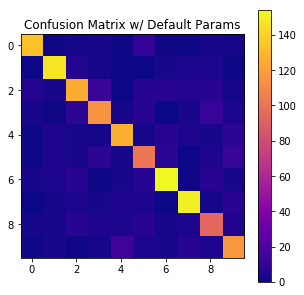

In [8]:
cnf_matrix_dt = confusion_matrix(y_test,pred_dt)
plt.figure(figsize=(5,5))
plt.imshow(cnf_matrix_dt, cmap='plasma')
plt.colorbar()
plt.title("Confusion Matrix w/ Default Params")

### Display Prediction Examples
First, we add indicies of correct and incorrectly predicted classes to arrays.

In [9]:
correct_indices = np.nonzero(pred_dt == y_test)[0]
incorrect_indices = np.nonzero(pred_dt != y_test)[0]

#### Correctly Predicted Classes
Next, we plot the first 6 examples of correctly predicted classes.

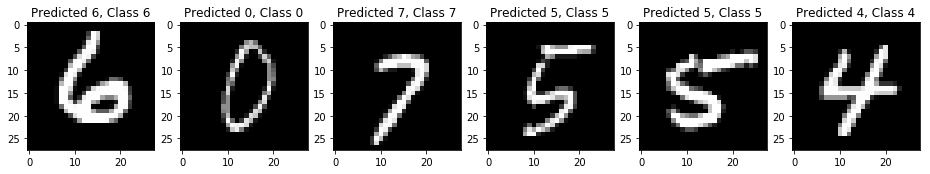

In [10]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, correct in enumerate(correct_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_dt[correct], y_test[correct]))

#### Incorrectly Predicted Classes
The following are examples of incorrectly predicted classes.

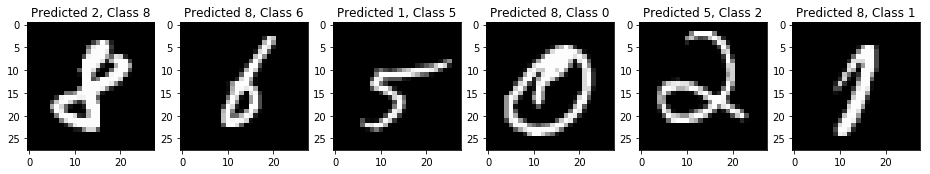

In [11]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, incorrect in enumerate(incorrect_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_dt[incorrect], y_test[incorrect]))

### Evaluation of Incorrect Prediction

Compared to the ANN, the decision tree classifier was less accurate and made some more obvious mistakes. It struggled often to identify major features that are similar between two numbers, as example six shows. The algorithm saw the top of the '7' as a downward curve and misinterpreted it as the top of the number '4'. It appears that the Decision Tree algorithm was worse at identifying the general shapes of a lot of numbers if they didn't fit closely to the general style of writing the number, as shown in the first two examples, where the '8' is more slanted and has a gap at the top, and the '0' has a line down the center. 

## Decision Tree Classifier with Different Depths

In [13]:
test_accuracy = []
valid_accuracy = []
t0 = time()
depth_range = 100
for i in range(1, depth_range):
    ti = time()
    clf_dt_depth = DecisionTreeClassifier(max_depth=i)
    clf_dt_depth.fit(X_train.reshape(-1,28*28), y_train)
    test_pred_dt = clf_dt_depth.predict(X_test.reshape(-1,28*28))
    valid_pred_dt = clf_dt_depth.predict(X_valid.reshape(-1,28*28))
    test_accuracy.append(accuracy_score(y_test, test_pred_dt))
    valid_accuracy.append(accuracy_score(y_valid, valid_pred_dt))
    print('Depth: {}/{} and took %.2fs'.format(i,depth_range) % (time()-ti))
print(clf_dt_depth.fit(X_train.reshape(-1,28*28), y_train))
print('Time elapsed: %.2fs' % (time()-t0))

Depth: 1/100 and took 0.05s
Depth: 2/100 and took 0.08s
Depth: 3/100 and took 0.11s
Depth: 4/100 and took 0.14s
Depth: 5/100 and took 0.17s
Depth: 6/100 and took 0.21s
Depth: 7/100 and took 0.24s
Depth: 8/100 and took 0.27s
Depth: 9/100 and took 0.29s
Depth: 10/100 and took 0.31s
Depth: 11/100 and took 0.32s
Depth: 12/100 and took 0.34s
Depth: 13/100 and took 0.34s
Depth: 14/100 and took 0.35s
Depth: 15/100 and took 0.35s
Depth: 16/100 and took 0.36s
Depth: 17/100 and took 0.36s
Depth: 18/100 and took 0.36s
Depth: 19/100 and took 0.36s
Depth: 20/100 and took 0.36s
Depth: 21/100 and took 0.37s
Depth: 22/100 and took 0.36s
Depth: 23/100 and took 0.36s
Depth: 24/100 and took 0.36s
Depth: 25/100 and took 0.36s
Depth: 26/100 and took 0.36s
Depth: 27/100 and took 0.37s
Depth: 28/100 and took 0.36s
Depth: 29/100 and took 0.37s
Depth: 30/100 and took 0.36s
Depth: 31/100 and took 0.36s
Depth: 32/100 and took 0.36s
Depth: 33/100 and took 0.36s
Depth: 34/100 and took 0.36s
Depth: 35/100 and took 

### Plot the Accuracy

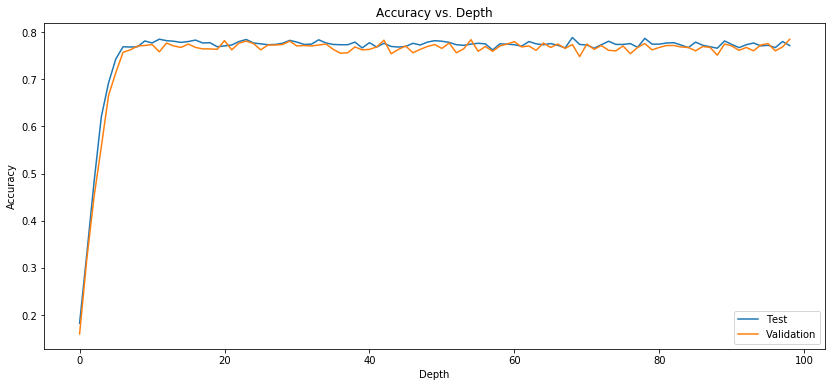

In [14]:
plt.figure(figsize=(14,6))
plt.title('Accuracy vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(test_accuracy)
plt.plot(valid_accuracy)
plt.legend(['Test', 'Validation'])
plt.show()

In [15]:
print('Highest test accuracy: {} at depth of {}'
      .format(max(test_accuracy), test_accuracy.index(max(test_accuracy))+1))
print('Highest validation accuracy: {} at depth of {}'
      .format(max(valid_accuracy), valid_accuracy.index(max(valid_accuracy))+1))

Highest test accuracy: 0.7883076923076923 at depth of 69
Highest validation accuracy: 0.7846153846153846 at depth of 99


### Use the Best Depth
From the above analysis, we create a decision tree at the best depth and run a prediction on the test data sets.

In [16]:
clf_dt_best_depth = DecisionTreeClassifier(max_depth=test_accuracy.index(max(test_accuracy))+1)
clf_dt_best_depth.fit(X_train.reshape(-1,28*28), y_train)
pred_dt_best_depth = clf_dt_best_depth.predict(X_test.reshape(-1,28*28))

### Confusion Matrix at Best Depth

Text(0.5,1,'Confusion Matrix at Best Depth of 69')

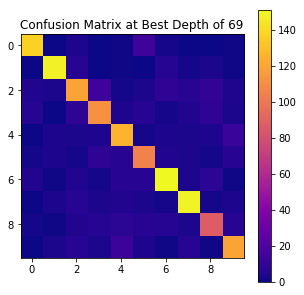

In [17]:
cnf_matrix_bd = confusion_matrix(y_test,pred_dt_best_depth)
plt.figure(figsize=(5,5))
plt.imshow(cnf_matrix_bd, cmap='plasma')
plt.colorbar()
plt.title("Confusion Matrix at Best Depth of {}".format(test_accuracy.index(max(test_accuracy))+1))

### Display Prediction Examples at Best Depth
Again, we add indicies of correct and incorrectly predicted classes to arrays. 

In [18]:
correct_indices_d = np.nonzero(pred_dt_best_depth == y_test)[0]
incorrect_indices_d = np.nonzero(pred_dt_best_depth != y_test)[0]

#### Correctly Predicted Classes
Next, we plot the first 6 examples of correctly predicted classes.

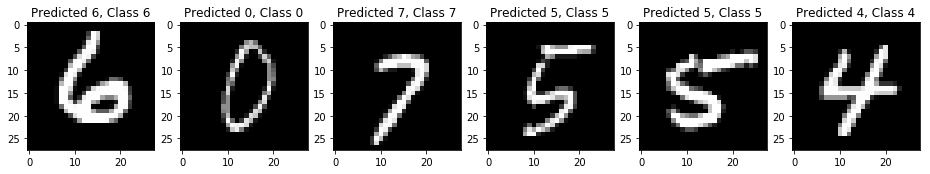

In [19]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, correct in enumerate(correct_indices_d[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_dt_best_depth[correct], y_test[correct]))

#### Incorrectly Predicted Classes
Then, we plot the first 6 examples of incorrectly predicted classes.

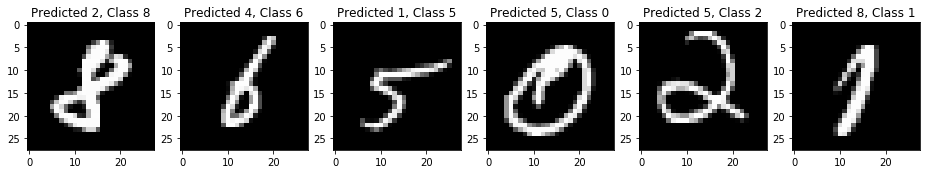

In [20]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, incorrect in enumerate(incorrect_indices_d[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred_dt_best_depth[incorrect], y_test[incorrect]))

## Importances of Each Pixel
To better understand how these the decision trees work we create a heatmap of the importances of each pixel. We do this for each decision tree and compaire the differences in the third graphic.

We see that pixels in the center of the image seem to be the most important and pixels around the edges are not.

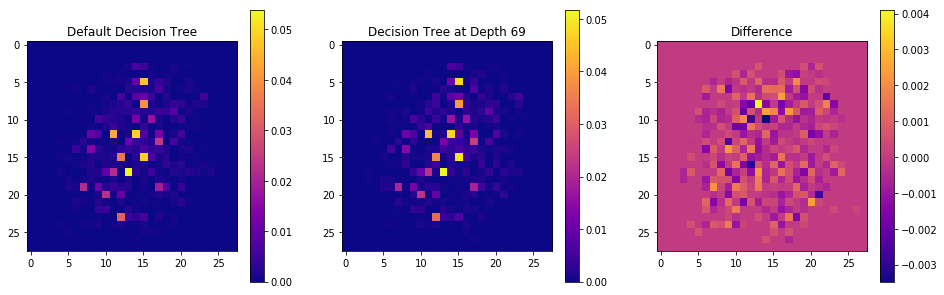

In [24]:
importances_dt = clf_dt.feature_importances_
importances_depth = clf_dt_best_depth.feature_importances_

heat_dt = importances_dt.reshape(28,28)
heat_depth = importances_depth.reshape(28,28)
heat_dif = heat_dt-heat_depth
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title('Default Decision Tree')
plt.imshow(heat_dt, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.subplot(1,3,2)
plt.title('Decision Tree at Depth {}'.format(test_accuracy.index(max(test_accuracy))+1))
plt.imshow(heat_depth, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.subplot(1,3,3)
plt.title('Difference')
plt.imshow(heat_dif, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.show()

## Decision Tree with Custom Features
So far we have only dealt with fitting decision trees on the pixel features of each image. What if we were to only feed it extracted information from each image instead? In this section we define a series of custom features, including:
* The average value of all the pixels.
* Number of features with a value > 0.
* Sum of center of mass coordinates (X+Y).
* Mean of center of mass coordinates ((X+Y)/2).

We start by defining if we should add in the pixel features or not.

In [25]:
add_in_pixels = False

### Create Custom Features
Next, we create a function to loop through a numpy array and extract features. These are then added to a new array that is returned.

In [26]:
def add_custom_features(features):
    new_features = []
    for feature in features:
        if add_in_pixels:
            tmp_feature = feature.reshape(28*28)
            tmp_feature = tmp_feature.tolist()
        else:
            tmp_feature = []
        tmp_feature.append(np.mean(feature))  # Find the average pixel value
        tmp_feature.append(np.count_nonzero(feature.tolist()))  # Count non-zero values
        center = ndimage.measurements.center_of_mass(feature.reshape(28,28))
        tmp_feature.append(np.sum(center))  # Sum of center of mass
        tmp_feature.append(np.mean(center))  # Mean of center of mass
        new_features.append(tmp_feature)
    return np.array(new_features)

Here we call the function and create new X_train, X_test, and X_valid arrays with the processed features.

In [27]:
X_train_new = add_custom_features(X_train)
X_test_new = add_custom_features(X_test)
X_valid_new = add_custom_features(X_valid)

### Create a New Decision Tree
We then fit a new decision tree on these features.

In [33]:
t0 = time()
clf_dt_new = DecisionTreeClassifier()
clf_dt_new.fit(X_train_new, y_train)
print('Time elapsed: %.2fs' % (time()-t0))

Time elapsed: 0.01s


### Run the Prediction
Testing the accuracy we get 21.8%. This is is 11.8% bettern than randomly choosing a predicted class.

In [29]:
pred_dt_new = clf_dt_new.predict(X_test_new)
print('Predicted', len(pred_dt), 'digits with accuracy:', accuracy_score(y_test, pred_dt_new))

Predicted 1625 digits with accuracy: 0.21846153846153846


### Display Importances of Each Feature
Next, we then find the importances of each of our new features.

In [30]:
if add_in_pixels:
    importances_dt_new = clf_dt_new.feature_importances_[784:]
else:
    importances_dt_new = clf_dt_new.feature_importances_
print('Importanes: {}'.format(importances_dt_new))

Importanes: [0.33127778 0.28685049 0.18125242 0.20061931]


We can graph these in a bar graph to compair.

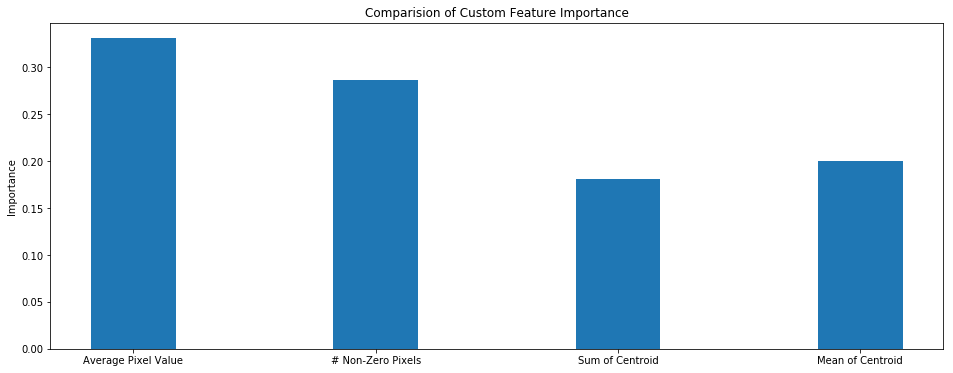

In [31]:
plt.figure(figsize=(16,6))
ind = np.arange(len(importances_dt_new))
plt.bar(ind, importances_dt_new, 0.35)
plt.title('Comparision of Custom Feature Importance')
plt.ylabel('Importance')
plt.xticks(ind, ('Average Pixel Value', '# Non-Zero Pixels', 'Sum of Centroid', 'Mean of Centroid'))
plt.show()

### Custom Feature Confusion Matrix
We can now create a confusion matrix of the accuracy of our predicted values.

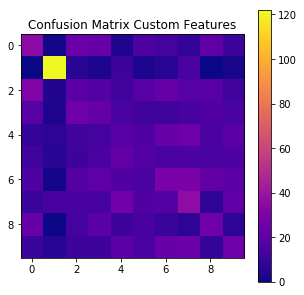

In [32]:
cnf_matrix_custom = confusion_matrix(y_test,pred_dt_new)
plt.figure(figsize=(5,5))
plt.imshow(cnf_matrix_custom, cmap='plasma')
plt.colorbar()
plt.title("Confusion Matrix Custom Features")
plt.show()